# Covid-19 Virus Data Review Technique
## Initial investigation of a potentially new analysis method for data sampled over regular periods is continuous, but the sub-period data collection, may be irregular with the overall period, but having a relatively consistent pattern period to period. 
### Method Proposed by Mark B. Brantana 10/11/2020

# Table of Contents

[1 Introduction: Description of the Problem and Discussion of the Background](#Section_1)<br>
[2 Data: Description of the Data and How it is Used to Solve the Problem](#Section_2)<br>
&nbsp;&nbsp;[Data Import and Analysis](#Section_3)<br>
[3 Methodology](#Section_4)<br>
[4 Results](#Section_5)<br>
[5 Discussion](#Section_6)<br>
[6 Conclusions](#Section_7)<br>
[Appendix 1: Link to Full Report](#Section_8)<br>
[Appendix 2: Acknowledgements and Johns Hopkins Data Sources](#Section_9)

<a id='Section_1'></a>
### Introduction: Description of the Problem and Discussion of the Background

The work presented here tackles an issue of data collection presented by differences in data collection resources in the JHU (The Johns Hopkins Bloomberg School of Public Health) COVID-19 Map.<br><br>

The global pandemic, COVID-19, was first noticed within the US in January 2020 after its appearance as an epidemic in Wohan, China, widely considered to be the origin of the virus. COVID-19 had by then become epidemic in European countries, but had yet to reach the US with in great numbers.<br><br>

JHU first published their COVID-19 Tracking Map on Jan. 22. "Professor Lauren Gardner, a civil and systems engineering professor at Johns Hopkins University, built the dashboard with her graduate student, Ensheng Dong. It is maintained at the Center for Systems Science and Engineering at the Whiting School of Engineering, with technical support from ESRI and the Johns Hopkins University Applied Physics Laboratory. Gardner is co-director of the CSSE." [JHU Map FAQ](https://coronavirus.jhu.edu/map-faq) In providing work JHU not only provided a data rich platform with wide ranging possibilities for understanding the virus, but also rich with broad ranging lessons for data analysis and statistical considerations. <br><br>

During such a pandemic the public will need to understand, for safety and economic reasons, which way the tide of the emergency is turning; whether things are getting better or worse, whether to hunker down or to go out in public, when we can expect to return to normalcy, and to confirm these facts for our societal leaders and public health officials<br><br>

<b>It must be understood that the writer does not believe JHU makes any representation to day to day case accuracy. This analysis takes nothing away from the splendid work and public service they have created in their analysis.  The writer contends only that, as with other data collections and analyses, limitations exist, however small, and he seeks only to improve upon vailable analysis techniques. This analysis is offered purely to study potentially new and useful useful data analysis technique. Any errors or omissions are exclusively the fault of the writer.</b> <br><br>

The most recent source Information, Links and Terms of Use are available from their referenced Repository at [GitHub.](https://github.com/CSSEGISandData/COVID-19.git) At the time of this writing, the overall map for the US appears as in FIGURE 1. 

FIGURE 1 - Example of JHU Dashboard showing US Summary Data from 10/11/2020

![](100.png)

Of particular interest to this study are the Daily New Confirmed Cases reports, from week to week, causing overall weekly data to appear sawtoothed due to variability, as seen in the New US and Texas Confirmed Cases of FIGURES 2 & 3.<br><br>

FIGURE 2 - Example of US Daily New Covid-19 Cases from JHU Dashboard from 10/11/2020

![](120.png)

FIGURE 3 - Example of US Daily New Covid-19 Cases from JHU Dashboard from 10/11/2020

![](200.png)


A general 7-day pattern particularly emerges, which is likely due to the frequency and timeliness of data made available. Data per weekday (ie, Sunday through Saturday) appear distinct from each other weekday, however, does appear consistent week to week. This weekly sawtooth pattern appears in all of the Daily graphs, regardless of region or statistic the same patter emerges.<br><br>

Due to large numbers, this sawtooth pattern presents little variation in the accuracy, but is inconvenient to an analysis of the trajectory of the virus. T<br><br>

A general 7-day pattern particularly emerges, which is likely due to the frequency and timeliness of data made available. Data per weekday (ie, Sunday through Saturday) appear distinct from each other weekday, however, does appear consistent week to week. This weekly sawtooth pattern appears in all of the Daily graphs, regardless of region or statistic the same patter emerges. Due to large numbers, this sawtooth pattern presents little variation in the accuracy, but is inconvenient to a daily analysis of the increasing or decreasing trajectory of the virus.<br><br>

This study considers a method to score the COVID-19 trending data through "voting moving averages" over the current and preceeding 7 days to gain an predictive index which can better indicate the dynamic trend. Overall US and Overall Texas data are used to review this method. The US data represent a larger daily number of sources and the Texas representing a smaller number of daily resources. Of particular note is the anomolous spike in TX data on 9/21/2020.<br><br>

A reasonable cause of the weekday variation is that JHU collects from a schedule of resources by weekday, and conversely, that the resources schedule release of their data on a particular weekday. This is not to say that a given resource might not change their release pattern at any given time, but it is taken as a priori that a significant bulk of resources do not change at once, and likely not in significant numbers within any given 14 day period. Thus, changes in release/collection schedule are assumed to not present significant overall variation to our method.<br><br>

<a id='Section_2'></a>
### Data: Description of the Data and How it is Used to Solve the Problem

Global US data is to be downloaded directly from JHU GitHub, to a Dataframe. It is It will be scrubbed leaving only the pertinent information relating to Texas Daily Cases.

The revised dataset will be considered to contain information from an undefined subset of the whole source list. However, there is little value in identifying the specific sources, as it is considered that the appropriate sources are sampled over various days. No assumption is made as to the specific time, day, or date of the individual source samplings, and though there may be an assumption that most of the individual data is generally sampled from one week to the next. The writer believes this may be sufficient periodicity to significantly smooth the data for good result.

The revised dataset will be considered to contain information from an undefined subset of the whole source list.  However, there is little value in identifying the specific sources, as it is considered that the appropriate sources are sampled over various days. No assumption is made as to the specific time, day, or date of the individual source samplings, and though there may be an assumption that most of the individual data is generally sampled from one week to the next. The writer believes this may be sufficient periodicity to significantly smooth the data for good result.

For example, considering a simple up (positive), down (negative), even (unchanging) average scoring system:
 - suppose in the past week that all seven dynamic moving averages concluded positive slopes. This would be a strong indicator of increasing daily new cases. 
 - Likewise, seven negative dynamic moving averages would strongly indicate a reducing number of new cases. 
 - A mixed, but smoothly transitioning result, though less strong, might contain some useful trend information especially if comparison with previous dates could be shown to support the predicted transition.  In this case, previous analyses may help validate the predicted trend, and might do so with some signicant reliability given the increased number of data points contributed by the previous week(s).
 - Least helpful, and indicating only uncertainty is a mixed result lacking any trend. Such a result would clearly contribute less overall trending information, either up or down or steady.

Ultimately, the overall Weekday Dynamic Moving Average, developed hereafter, will be compared Moving Average analysis.

<a id='Section_3'></a>
### Data Import and Analysis

The following code segments:
 - Download the raw Cumulative JHU data for the US and TX
From this data it builds a dataframe containing:
 - Date: Dashboard Report Date
 - Day: Weekday
 - Total: Cumulative Current Daily Cases
 - Daily: Differential Daily Cases of the Total
 - Dynamic: Differential (or second derivative) Daily
 - Daily MA-7: 7-Day Moving Daily Average
 - Daily MA-14: 14-Day Moving Daily Average
 - Slope-7: 7-Day difference by <b>Weekday</b>
 - Slope MA-7: 7-Day Moving <b>Weekday</b> Average
 This is followed by graphical plots of the above data as deemed necessary to the analysis.

In [1]:
# IMPORT PACKAGES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set

<function seaborn.rcmod.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)>

In [2]:
# IMPORT CONFIRMED US CASES FROM GIT (JOHNS HOPKINS DATA) AND READ TO A MASTER DATAFILE
url_confirmed_US="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
# REDUCE THE DATAFILES TO INCLUDE USA AND TEXAS INFORMATION
confirmed_US=pd.read_csv(url_confirmed_US)
confirmed_TX=confirmed_US.loc[confirmed_US['Province_State'] == "Texas"]
# SCRUB IRRELEVENT COLUMNS TO SIMPLIFY
confirmed_US=confirmed_US.drop(['Admin2','UID','iso2','iso3','Province_State','code3','FIPS','Country_Region','Lat','Long_','Combined_Key'],axis=1)
confirmed_TX=confirmed_TX.drop(['Admin2','UID','iso2','iso3','Province_State','code3','FIPS','Country_Region','Lat','Long_','Combined_Key'],axis=1)

In [3]:
# DEVELOP ANALYTICAL DATA
# DEVELOP DAILY CUMULATIVE SUM DATA
US_cumulative=confirmed_US.sum(axis=0)
TX_cumulative=confirmed_TX.sum(axis=0)
# CONVERT CUMULATIVE DATA TO DIFFERENTIAL DATA
US_diff=US_cumulative.diff().fillna(US_cumulative)
TX_diff=TX_cumulative.diff().fillna(TX_cumulative)
# DEVELOP DATAFRAME FOR DYNAMIC DATA ANALYSIS BY WEEKDAYS
# US
US_dynamic=US_diff.diff().fillna(US_diff)
TX_dynamic=TX_diff.diff().fillna(TX_diff)

In [4]:
# PREPARE WORKING DATAFRAME
# US
US_df=pd.DataFrame(data=US_cumulative)
US_df=US_df.reset_index()
US_df.columns = ['Date', 'Total']
US_df['Date']=pd.to_datetime(US_df.Date)
US_diff=US_diff.reset_index()
US_diff.columns=['Date', 'Daily']
US_df['Daily']=US_diff['Daily']
US_dynamic=US_dynamic.reset_index()
US_dynamic.columns=['Date', 'Dynamic']
US_df['Dynamic']=US_dynamic['Dynamic']
# TX
TX_df=pd.DataFrame(data=TX_cumulative)
TX_df=TX_df.reset_index()
TX_df.columns = ['Date', 'Total']
TX_df['Date']=pd.to_datetime(TX_df.Date)
TX_diff=TX_diff.reset_index()
TX_diff.columns=['Date', 'Daily']
TX_df['Daily']=TX_diff['Daily']
TX_dynamic=TX_dynamic.reset_index()
TX_dynamic.columns=['Date', 'Dynamic']
TX_df['Dynamic']=TX_dynamic['Dynamic']

In [5]:
# INSERT DAY INFORMATION CALCULATED FROM DATE DATA.
#US
US_df.insert(loc=1, column='Day', value=US_df['Date'], allow_duplicates = False)
US_df['Day'] = US_df['Day'].dt.strftime("%A")
#TX
TX_df.insert(loc=1, column='Day', value=TX_df['Date'], allow_duplicates = False)
TX_df['Day'] = TX_df['Day'].dt.strftime("%A")

In [6]:
# DEVELOP 7 AND 14 DAY MOVING AVERAGES OF DAILY DATA
# US
US_df['Dynamic MA-7'] = US_df['Dynamic'].rolling(7).mean().shift(7)
US_df['Dynamic MA-14'] = US_df['Dynamic'].rolling(14).mean().shift(14)
# TX
TX_df['Dynamic MA-7'] = TX_df['Dynamic'].rolling(7).mean().shift(7)
TX_df['Dynamic MA-14'] = TX_df['Dynamic'].rolling(14).mean().shift(14)

In [7]:
# DEVELOP 7-DAY MOVING SLOPE DDATA
# FIRST: BREAK THE DATA INTO INDIVIDUAL DAILY DATAFRAMES FOR ANALYSIS
US_sun = US_df[US_df['Day'] == 'Sunday']
US_mon = US_df[US_df['Day'] == 'Monday']
US_tue = US_df[US_df['Day'] == 'Tuesday']
US_wed = US_df[US_df['Day'] == 'Wednesday']
US_thu = US_df[US_df['Day'] == 'Thursday']
US_fri = US_df[US_df['Day'] == 'Friday']
US_sat = US_df[US_df['Day'] == 'Saturday']
TX_sun = TX_df[TX_df['Day'] == 'Sunday']
TX_mon = TX_df[TX_df['Day'] == 'Monday']
TX_tue = TX_df[TX_df['Day'] == 'Tuesday']
TX_wed = TX_df[TX_df['Day'] == 'Wednesday']
TX_thu = TX_df[TX_df['Day'] == 'Thursday']
TX_fri = TX_df[TX_df['Day'] == 'Friday']
TX_sat = TX_df[TX_df['Day'] == 'Saturday']
# SECOND: DEVELOP SLOPES
# US
US_sun = US_sun['Daily'].diff().fillna(US_sun['Daily'])/7
US_mon = US_mon['Daily'].diff().fillna(US_mon['Daily'])/7
US_tue = US_tue['Daily'].diff().fillna(US_tue['Daily'])/7
US_wed = US_wed['Daily'].diff().fillna(US_wed['Daily'])/7
US_thu = US_thu['Daily'].diff().fillna(US_thu['Daily'])/7
US_fri = US_fri['Daily'].diff().fillna(US_fri['Daily'])/7
US_sat = US_sat['Daily'].diff().fillna(US_sat['Daily'])/7
# TX
TX_sun = TX_sun['Daily'].diff().fillna(TX_sun['Daily'])/7
TX_mon = TX_mon['Daily'].diff().fillna(TX_mon['Daily'])/7
TX_tue = TX_tue['Daily'].diff().fillna(TX_tue['Daily'])/7
TX_wed = TX_wed['Daily'].diff().fillna(TX_wed['Daily'])/7
TX_thu = TX_thu['Daily'].diff().fillna(TX_thu['Daily'])/7
TX_fri = TX_fri['Daily'].diff().fillna(TX_fri['Daily'])/7
TX_sat = TX_sat['Daily'].diff().fillna(TX_sat['Daily'])/7
# THIRD: RECOMBINE THE DATA AS A SINGLE DATAFRAME AND IN THE ORIGINAL ORDER
# US
US_slopes=US_thu
US_slopes=US_slopes.append(US_fri, ignore_index=False)
US_slopes=US_slopes.append(US_sat, ignore_index=False)
US_slopes=US_slopes.append(US_sun, ignore_index=False)
US_slopes=US_slopes.append(US_mon, ignore_index=False)
US_slopes=US_slopes.append(US_tue, ignore_index=False)
US_slopes=US_slopes.append(US_wed, ignore_index=False)
US_slopes=US_slopes.sort_index()
US_df['Slope-7']=US_slopes
# TX
TX_slopes=TX_thu
TX_slopes=TX_slopes.append(TX_fri, ignore_index=False)
TX_slopes=TX_slopes.append(TX_sat, ignore_index=False)
TX_slopes=TX_slopes.append(TX_sun, ignore_index=False)
TX_slopes=TX_slopes.append(TX_mon, ignore_index=False)
TX_slopes=TX_slopes.append(TX_tue, ignore_index=False)
TX_slopes=TX_slopes.append(TX_wed, ignore_index=False)
TX_slopes=TX_slopes.sort_index()
TX_df['Slope-7']=TX_slopes

In [8]:
# DEVELOP 7 AND 14 DAY MOVING AVERAGES OF DAILY DYNAMIC DATA
# US
US_df['Slope MA-7'] = US_df['Slope-7'].rolling(7).mean().shift(7)
# TX
TX_df['Slope MA-7'] = TX_df['Slope-7'].rolling(7).mean().shift(7)

In [9]:
# CHANGE MOVING AVERAGE SHIFT RELATED VALUES FROM "NaN" TO "0"
US_df=US_df.fillna(0)
TX_df=TX_df.fillna(0)

The following is a sample of the first and last 5 rows of the devloped US dataframe from which subsequent plots are made:

In [10]:
US_df

,Date,Day,Total,Daily,Dynamic,Dynamic MA-7,Dynamic MA-14,Slope-7,Slope MA-7
0,2020-01-22,Wednesday,1,1.0,1.0,0.000000,0.000000,0.142857,0.000000
1,2020-01-23,Thursday,1,0.0,-1.0,0.000000,0.000000,0.000000,0.000000
2,2020-01-24,Friday,2,1.0,1.0,0.000000,0.000000,0.142857,0.000000
3,2020-01-25,Saturday,2,0.0,-1.0,0.000000,0.000000,0.000000,0.000000
4,2020-01-26,Sunday,5,3.0,3.0,0.000000,0.000000,0.428571,0.000000
...,...,...,...,...,...,...,...,...,...
258,2020-10-06,Tuesday,7499341,41939.0,2382.0,447.857143,873.500000,-23.000000,-282.326531
259,2020-10-07,Wednesday,7549682,50341.0,8402.0,424.571429,348.642857,1276.571429,-219.265306
260,2020-10-08,Thursday,7605873,56191.0,5850.0,88.142857,555.142857,1634.571429,-194.469388
261,2020-10-09,Friday,7663293,57420.0,1229.0,560.142857,218.785714,416.285714,-152.591837


The following is a sample of the first and last 5 rows of the devloped TX dataframe from which subsequent plots are made:

In [11]:
TX_df

,Date,Day,Total,Daily,Dynamic,Dynamic MA-7,Dynamic MA-14,Slope-7,Slope MA-7
0,2020-01-22,Wednesday,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,2020-01-23,Thursday,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2,2020-01-24,Friday,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,2020-01-25,Saturday,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,2020-01-26,Sunday,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
258,2020-10-06,Tuesday,798569,4250.0,125.0,-74.142857,228.500000,-259.428571,-463.448980
259,2020-10-07,Wednesday,803690,5121.0,871.0,600.714286,-251.642857,-90.571429,-326.530612
260,2020-10-08,Thursday,807754,4064.0,-1057.0,-105.142857,200.857143,49.571429,-339.714286
261,2020-10-09,Friday,812191,4437.0,373.0,266.857143,-150.000000,-161.857143,-311.571429


The follow are US and TX Bar Charts of the directly downloaded JHU cumulative daily cases data:

AxesSubplot(0.125,0.125;0.775x0.775)
AxesSubplot(0.125,0.125;0.775x0.775)


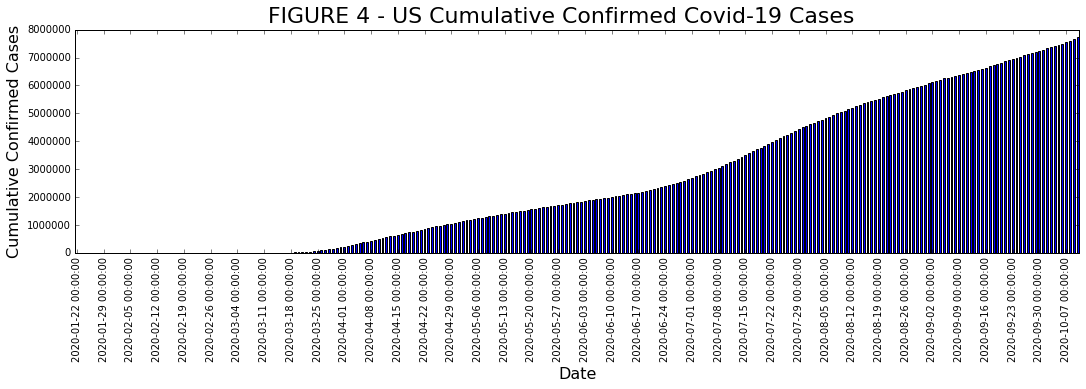

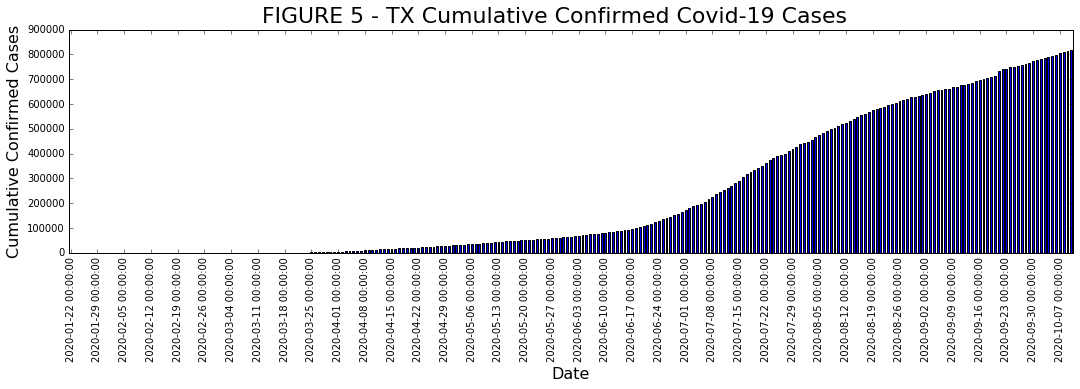

In [23]:
# PLOT CUMULATIVE DATA
# US
n=7
ax=US_df.plot(kind='bar',x='Date',y='Total',figsize=(18,4))
plt.suptitle('FIGURE 4 - US Cumulative Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Cumulative Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.get_legend().remove()
US_total_plot=ax
print(US_total_plot)
# TX
n=7
ax=TX_df.plot(kind='bar',x='Date',y='Total',figsize=(18,4))
plt.suptitle('FIGURE 5 - TX Cumulative Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Cumulative Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
ax.get_legend().remove()
TX_total_plot=ax
print(TX_total_plot)

The following are Daily cases developed, or first derivative of the above cumulative data:

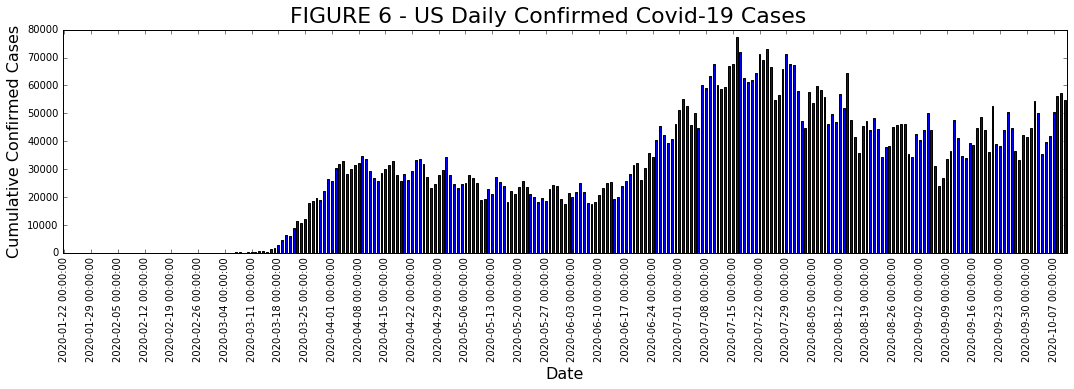

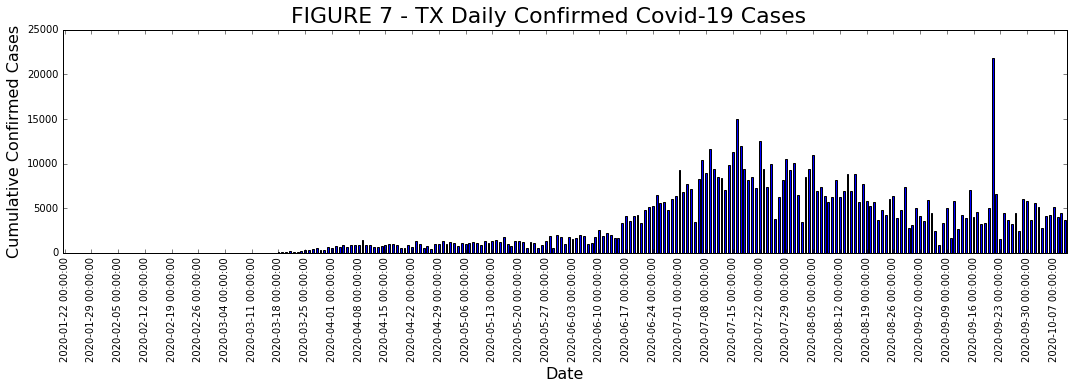

In [24]:
# PLOT DAILY DATA
# US
n=1
US_daily_plot=US_df.plot(kind='bar',x='Date',y='Daily',figsize=(18,4))
plt.suptitle('FIGURE 6 - US Daily Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Cumulative Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
US_daily_plot.xaxis.set_ticks(ticks[::n])
US_daily_plot.xaxis.set_ticklabels(ticklabels[::n])
US_daily_plot.get_legend().remove()
# TX
n=1
TX_daily_plot=TX_df.plot(kind='bar',x='Date',y='Daily',figsize=(18,4))
plt.suptitle('FIGURE 7 - TX Daily Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Cumulative Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_daily_plot.xaxis.set_ticks(ticks[::n])
TX_daily_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_daily_plot.get_legend().remove()

The following are Dynamic cases developed, or the second derivative of the above cumulative data:

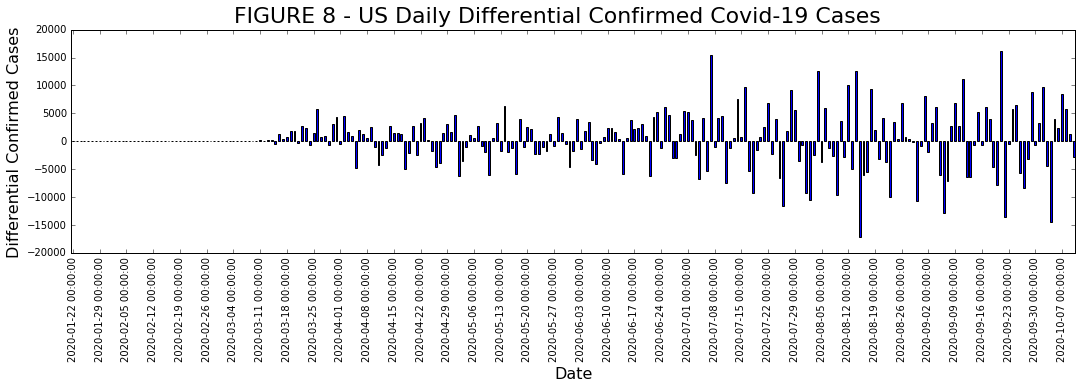

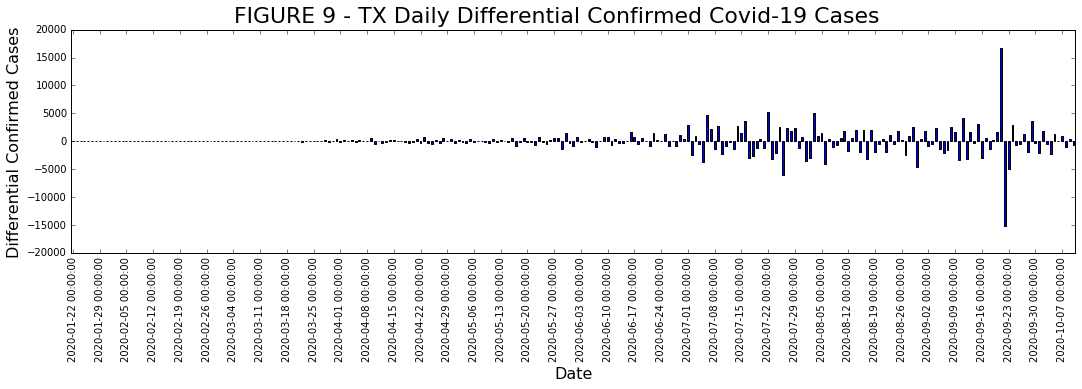

In [25]:
# PLOT DIFFERENTIAL DATA
# US
n=1
US_diff_plot=US_df.plot(kind='bar',x='Date',y='Dynamic',figsize=(18,4))
plt.suptitle('FIGURE 8 - US Daily Differential Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Differential Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
US_diff_plot.xaxis.set_ticks(ticks[::n])
US_diff_plot.xaxis.set_ticklabels(ticklabels[::n])
US_diff_plot.get_legend().remove()
# TX
n=1
TX_diff_plot=TX_df.plot(kind='bar',x='Date',y='Dynamic',figsize=(18,4))
plt.suptitle('FIGURE 9 - TX Daily Differential Confirmed Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Differential Confirmed Cases',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_diff_plot.xaxis.set_ticks(ticks[::n])
TX_diff_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_diff_plot.get_legend().remove()

The following is the 7-Day Slope from each weekday to the next:

(-800, 800)

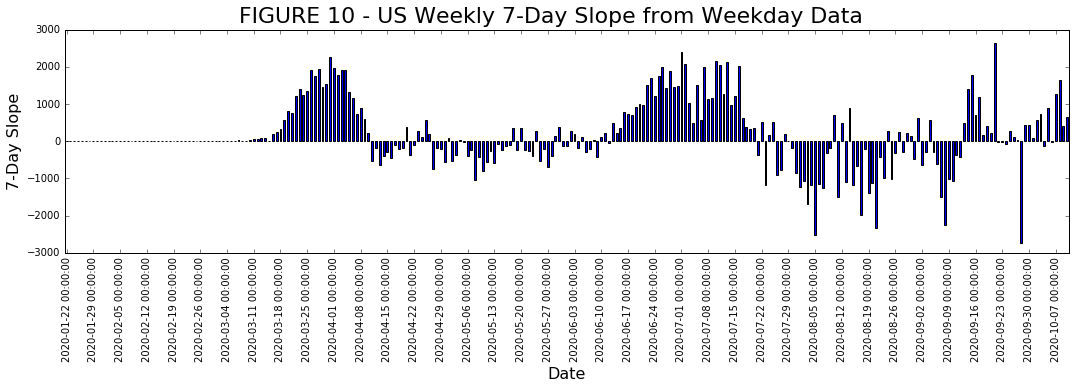

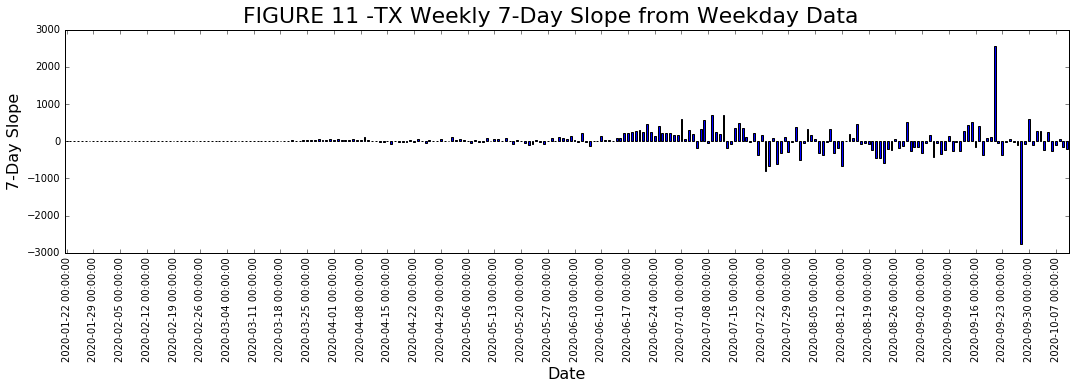

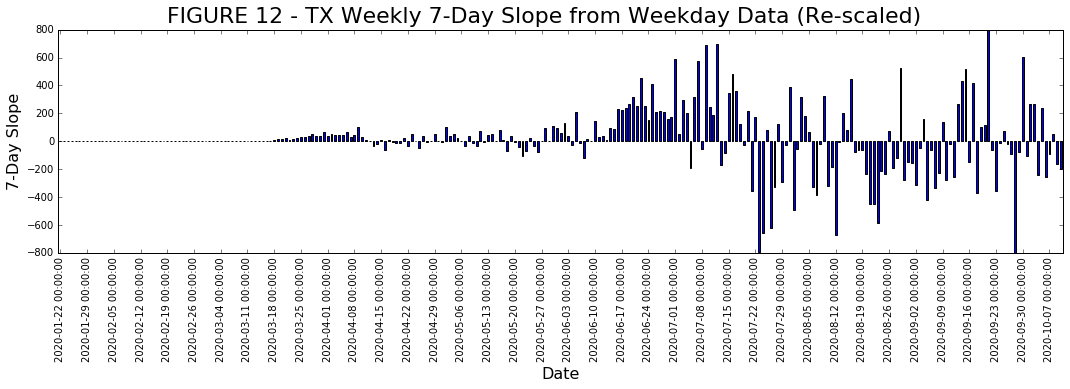

In [26]:
# PLOT 7-DAY SLOPE DATA
# US
n=1
US_7weekday_plot=US_df.plot(kind='bar',x='Date',y='Slope-7',figsize=(18,4))
plt.suptitle('FIGURE 10 - US Weekly 7-Day Slope from Weekday Data',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Slope',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
US_7weekday_plot.xaxis.set_ticks(ticks[::n])
US_7weekday_plot.xaxis.set_ticklabels(ticklabels[::n])
US_7weekday_plot.get_legend().remove()
# TX
n=1
TX_7weekday_plot=TX_df.plot(kind='bar',x='Date',y='Slope-7',figsize=(18,4))
plt.suptitle('FIGURE 11 -TX Weekly 7-Day Slope from Weekday Data',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Slope',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_7weekday_plot.xaxis.set_ticks(ticks[::n])
TX_7weekday_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_7weekday_plot.get_legend().remove()
# TX ALTERNATE PLOT
n=1
TX_7weekday_b_plot=TX_df.plot(kind='bar',x='Date',y='Slope-7',figsize=(18,4))
plt.suptitle('FIGURE 12 - TX Weekly 7-Day Slope from Weekday Data (Re-scaled)',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Slope',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_7weekday_b_plot.xaxis.set_ticks(ticks[::n])
TX_7weekday_b_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_7weekday_b_plot.get_legend().remove()
plt.ylim(-800, 800)

The following is the 7-day Moving Average of the Dynamic data:

(-800, 800)

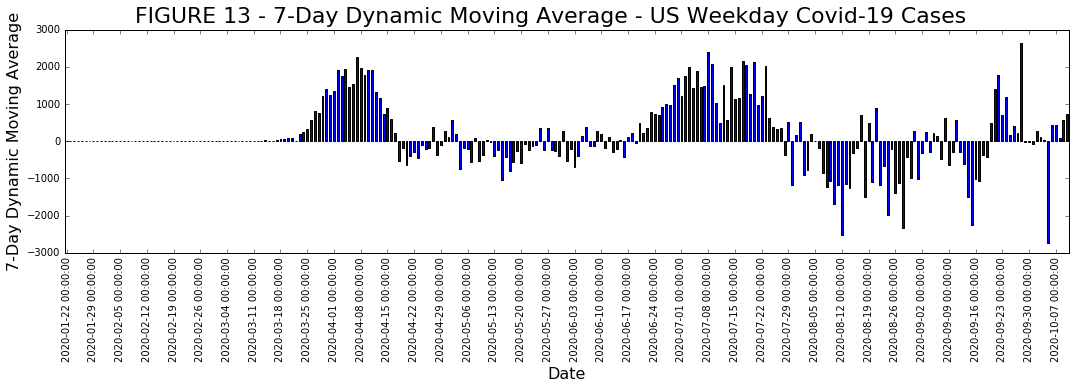

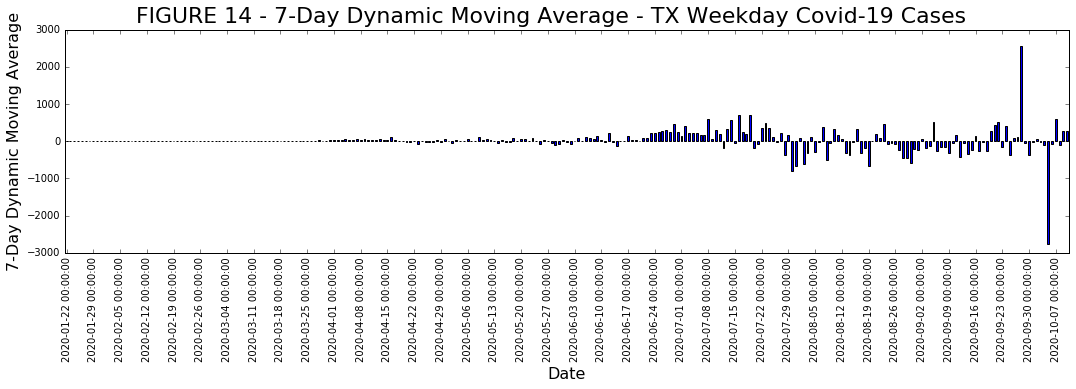

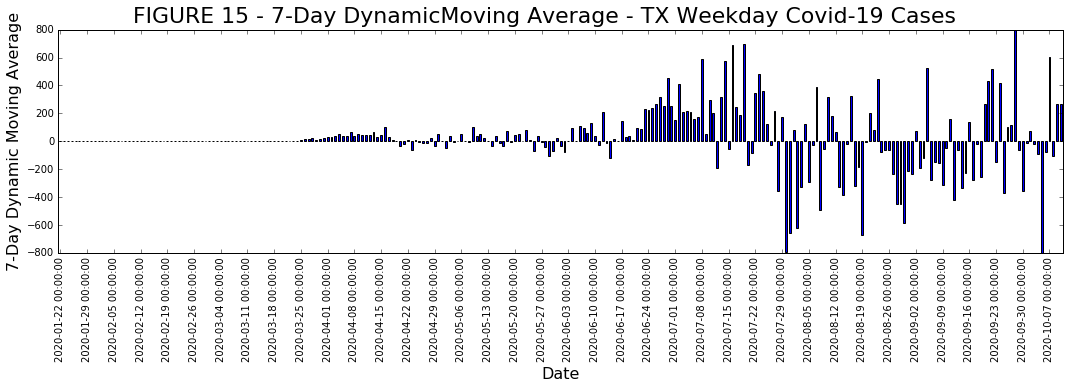

In [27]:
# PLOT 7-DAY MOVING AVERAGE DATA
# US
n=1
US_slope_MA7_plot=US_df.plot(kind='bar',x='Date',y='Dynamic MA-7',figsize=(18,4))
plt.suptitle('FIGURE 13 - 7-Day Dynamic Moving Average - US Weekday Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Dynamic Moving Average',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
US_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
US_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
US_slope_MA7_plot.get_legend().remove()
US_slope_MA7_plot=ax
# TX
n=1
TX_slope_MA7_plot=TX_df.plot(kind='bar',x='Date',y='Dynamic MA-7',figsize=(18,4))
plt.suptitle('FIGURE 14 - 7-Day Dynamic Moving Average - TX Weekday Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Dynamic Moving Average',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
TX_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_slope_MA7_plot.get_legend().remove()
# TX (Re-Scaled)
n=1
TX_slope_MA7_plot=TX_df.plot(kind='bar',x='Date',y='Dynamic MA-7',figsize=(18,4))
plt.suptitle('FIGURE 15 - 7-Day DynamicMoving Average - TX Weekday Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Dynamic Moving Average',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
TX_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_slope_MA7_plot.get_legend().remove()
plt.ylim(-800, 800)

The following is the 14-day Moving Average of the Dynamic data:

(-800, 800)

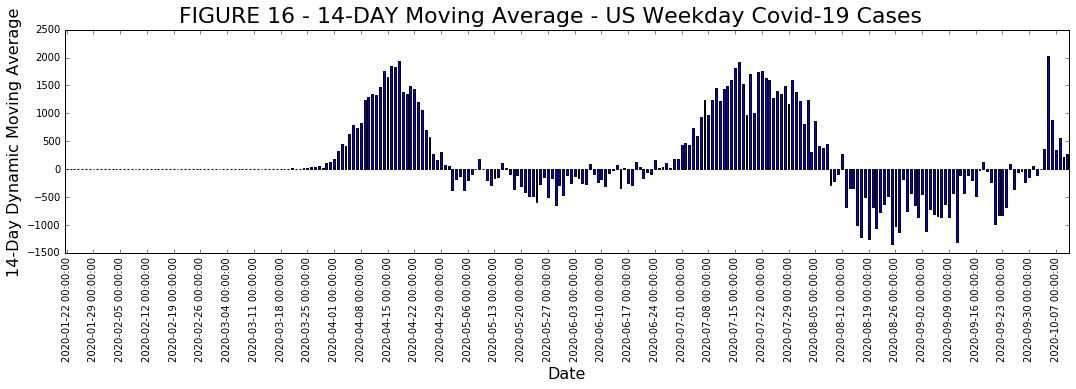

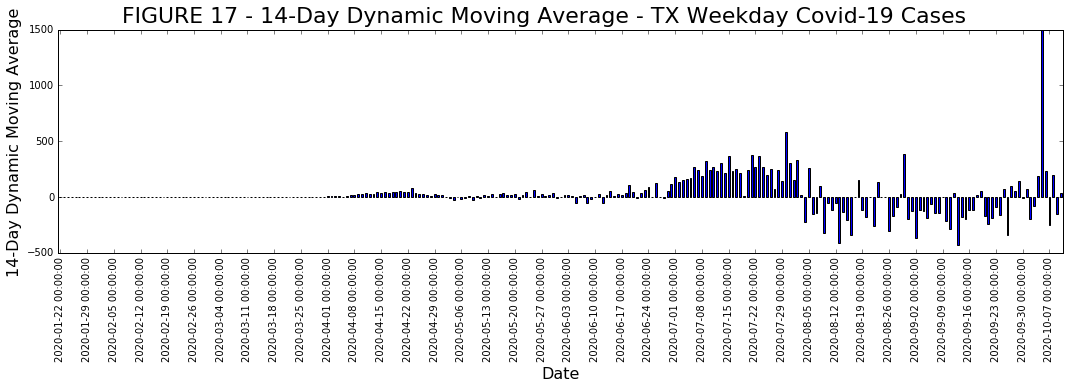

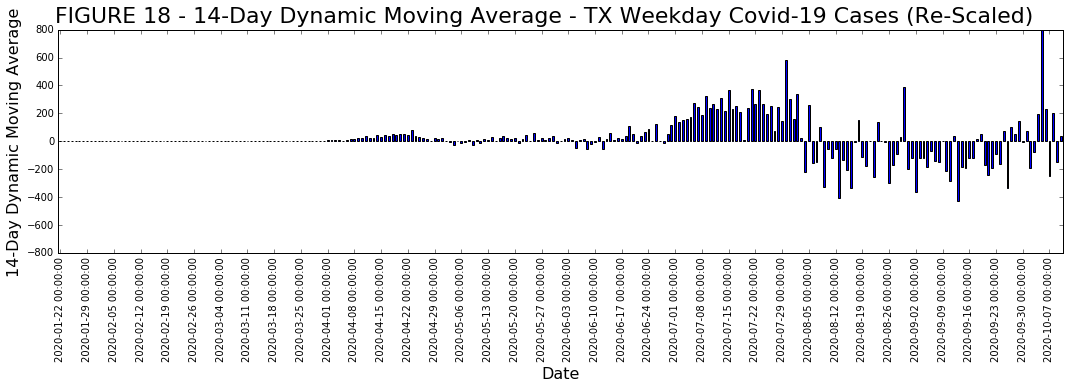

In [28]:
# PLOT 14-DAY MOVING AVERAGE DATA
# US
n=1
US_slope_MA7_plot=US_df.plot(kind='bar',x='Date',y='Dynamic MA-14',figsize=(18,4))
plt.suptitle('FIGURE 16 - 14-DAY Moving Average - US Weekday Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('14-Day Dynamic Moving Average',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
US_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
US_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
US_slope_MA7_plot.get_legend().remove()
US_slope_MA7_plot=ax
# TX
n=1
TX_slope_MA7_plot=TX_df.plot(kind='bar',x='Date',y='Dynamic MA-14',figsize=(18,4))
plt.suptitle('FIGURE 17 - 14-Day Dynamic Moving Average - TX Weekday Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('14-Day Dynamic Moving Average',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
TX_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_slope_MA7_plot.get_legend().remove()
# TX (Re-Scaled)
n=1
TX_slope_MA7_plot=TX_df.plot(kind='bar',x='Date',y='Dynamic MA-14',figsize=(18,4))
plt.suptitle('FIGURE 18 - 14-Day Dynamic Moving Average - TX Weekday Covid-19 Cases (Re-Scaled)',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('14-Day Dynamic Moving Average',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
TX_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_slope_MA7_plot.get_legend().remove()
plt.ylim(-800, 800)

The following is the 7-Day Slope data on a weekday basis:

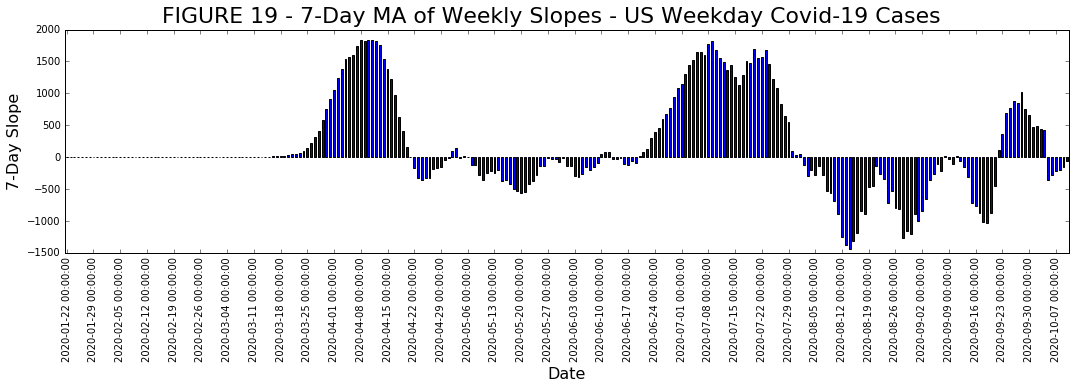

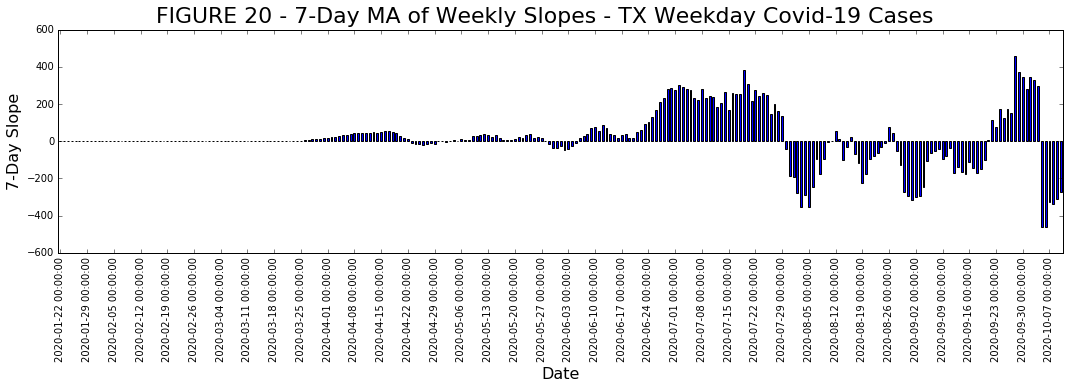

In [29]:
# PLOT 7-WEEKDAY SLOPE MOVING AVERAGE DATA
# US
n=1
US_slope_MA7_plot=US_df.plot(kind='bar',x='Date',y='Slope MA-7',figsize=(18,4))
plt.suptitle('FIGURE 19 - 7-Day MA of Weekly Slopes - US Weekday Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Slope',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
US_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
US_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
US_slope_MA7_plot.get_legend().remove()
US_slope_MA7_plot=ax
# TX
n=1
TX_slope_MA7_plot=TX_df.plot(kind='bar',x='Date',y='Slope MA-7',figsize=(18,4))
plt.suptitle('FIGURE 20 - 7-Day MA of Weekly Slopes - TX Weekday Covid-19 Cases',fontsize=22)
plt.xlabel('Date',fontsize=16)
plt.ylabel('7-Day Slope',fontsize=16)
ticks=ax.xaxis.get_ticklocs()
ticklabels=[l.get_text() for l in ax.xaxis.get_ticklabels()]
TX_slope_MA7_plot.xaxis.set_ticks(ticks[::n])
TX_slope_MA7_plot.xaxis.set_ticklabels(ticklabels[::n])
TX_slope_MA7_plot.get_legend().remove()

<a id='Section_4'></a>
### Methodology

The bar charts developed above are ultimately for comparison of the US and TX Moving Average plots of the "Slopes by Weekday" (Figures 19 & 20) against the more common "Daily" Moving Average over 7 days (FIGURES 13, 14 & 15) and over 14 days (FIGURES 16, 17 & 18.) 

<a id='Section_5'></a>
### Results

Comparison of these bar charts reveals a more coherent smoothing of the data by the new method. Direct review of the raw data has illustrated the accuracy and utility of the method to clearly identify a proximate date at which a trajectory change has occurred in both the US and the TX data.  <b><b>

A apparent anomoly, and possible disadvantage for the method, is highlighted in the TX data during the period +/- of the extreme incident spike occuring on 9/21. The reason for this spike bears further investigation. The spike may represent many things. It may be actual or may represent "catch-up" due to previously unreported cases; but this should be reviewed in a future study.<b><b>

<a id='Section_6'></a>
### Discussion

The method describes here is applicable to periodically and regularly grouped data. It depends upon having reasonably clean data on an overall period basis. The premise is that parallel internal data, one period to the next, is reasonably consistent. For example, we may assume that JHU samples all the periodic (weekly) on a weekly basis.

<a id='Section_7'></a>
### Conclusions

Further review and analysis of these study results may show that this method may rugedly sufficient to permit to permit large internal shifts of data collection within periods. Given this potential, further review is highly recommended. Though, in the end, messy data is still messy data, the method appears to offer an excellent and somewhat ruged arbitration by which to understand whether, under the circumstances, the data is rising or falling at a given point in time.

<a id='Section_8'></a>
### Link to Full Report

The present work is available at [GitHub.](https://github.com/brantana/Coursera_Capstone.git)<br><br>
A PDF presentation version  is available at the same site without the code, as a full report, and is published in a link provided at the site.

<a id='Section_9'></a>
### Appendix 2: Acknowledgements and Johns Hopkins Data Sources

### Acknowledgements

The above described analyses, along with any errors or omissions, shall be deemed to be the responsibility of the writer, Mark Brantana,who offers his thanks and credits for the terrific dataset and great humanitarian service offered by Johns Hopkins University, as follows:

The data set is licensed under the Creative Commons Attribution 4.0 International (CC BY 4.0) by the Johns Hopkins University on behalf of its Center for Systems Science in Engineering. Copyright Johns Hopkins University 2020.

Attribute the data as the "COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University" or "JHU CSSE COVID-19 Data" for short, and the url: https://github.com/CSSEGISandData/COVID-19.

For publications that use the data, please cite the following publication: "Dong E, Du H, Gardner L. An interactive web-based dashboard to track COVID-19 in real time. Lancet Inf Dis. 20(5):533-534. doi: 10.1016/S1473-3099(20)30120-1"

### DATA SOURCES:
This list includes a complete list of all sources ever used in the data set, since January 21, 2010. Some sources listed here (e.g., WHO, ECDC, US CDC, BNO News) are not currently relied upon as a source of data.

- Aggregated data sources:
  - World Health Organization (WHO): https://www.who.int/
  - European Centre for Disease Prevention and Control (ECDC): https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases 
  - DXY.cn. Pneumonia. 2020. http://3g.dxy.cn/newh5/view/pneumonia
  - US CDC: https://www.cdc.gov/coronavirus/2019-ncov/index.html
  - BNO News: https://bnonews.com/index.php/2020/02/the-latest-coronavirus-cases/
  - WorldoMeters: https://www.worldometers.info/coronavirus/  
  - 1Point3Arces: https://coronavirus.1point3acres.com/en  
  - COVID Tracking Project: https://covidtracking.com/data. (US Testing and Hospitalization Data. We use the maximum reported value from "Currently" and "Cumulative" Hospitalized for our hospitalization number reported for each state.)
  - Los Angeles Times: https://www.latimes.com/projects/california-coronavirus-cases-tracking-outbreak/
  - The Mercury News: https://www.mercurynews.com/tag/coronavirus/

- US data sources at the state (Admin1) or county/city (Admin2) level:  
  - Washington State Department of Health: https://www.doh.wa.gov/emergencies/coronavirus
  - Maryland Department of Health: https://coronavirus.maryland.gov/
  - New York State Department of Health: https://health.data.ny.gov/Health/New-York-State-Statewide-COVID-19-Testing/xdss-u53e/data
  - New York City Health Department: https://www1.nyc.gov/site/doh/covid/covid-19-data.page
  - NYC Department of Health and Mental Hygiene: https://www1.nyc.gov/site/doh/covid/covid-19-data.page and https://github.com/nychealth/coronavirus-data
  - Florida Department of Health Dashboard: https://services1.arcgis.com/CY1LXxl9zlJeBuRZ/arcgis/rest/services/Florida_COVID19_Cases/FeatureServer/0
    and https://fdoh.maps.arcgis.com/apps/opsdashboard/index.html#/8d0de33f260d444c852a615dc7837c86
  - Colorado: https://covid19.colorado.gov/covid-19-data
  - Virginia: https://www.vdh.virginia.gov/coronavirus/
  - Northern Mariana Islands CNMI Department of Public Health: https://cnmichcc.maps.arcgis.com/apps/opsdashboard/index.html#/4061b674fc964efe84f7774b7979d2b5
  - Missouri Department of Health: https://www.arcgis.com/apps/MapSeries/index.html?appid=8e01a5d8d8bd4b4f85add006f9e14a9d
  - Missouri: Nodaway County: https://www.nodawaypublichealth.org/
  - St. Louis City Department of Health: https://www.stlouis-mo.gov/covid-19/data/#totalsByDate
  - St. Louis County: https://stlcorona.com/resources/covid-19-statistics1/
  - Massachusetts: https://www.mass.gov/info-details/covid-19-response-reporting
  - Michigan: https://www.michigan.gov/coronavirus/0,9753,7-406-98163_98173---,00.html 
  - Illinois Department of Public Health: https://dph.illinois.gov/covid19
  - Indiana State Department of Health: https://hub.mph.in.gov/dataset?q=COVID
  - Connecticut Department of Public Health: https://data.ct.gov/stories/s/COVID-19-data/wa3g-tfvc/
  - Ohio Department of Health: https://coronavirus.ohio.gov/wps/portal/gov/covid-19/home
  - Oregon Office of Emergency Management: https://experience.arcgis.com/experience/fff9f83827c5461583cd014fdf4587de
  - Tennessee Department of Health: https://www.tn.gov/health/cedep/ncov.html
  - Rhode Island Department of Health: https://ri-department-of-health-covid-19-data-rihealth.hub.arcgis.com/
  - Wisconsin Department of Health Services: https://www.dhs.wisconsin.gov/covid-19/data.htm
  - North Carolina City of Greenville GIS: https://www.arcgis.com/apps/opsdashboard/index.html#/7aeac695cafa4065ba1505b1cfa72747
  - Iowa State Government: https://coronavirus.iowa.gov/
  - Minnesota Department of Health: https://www.health.state.mn.us/diseases/coronavirus/situation.html
  - Alabama Public Health: https://www.alabamapublichealth.gov/covid19/
  - Mississippi State Department of Health: https://msdh.ms.gov/msdhsite/_static/14,0,420.html
  - Nebraska Department of Health and Human Services: https://experience.arcgis.com/experience/ece0db09da4d4ca68252c3967aa1e9dd
  - South Carolina Department of Health and Environmental Control: https://scdhec.gov/infectious-diseases/viruses/coronavirus-disease-2019-covid-19/sc-testing-data-projections-covid-19
  - Nevada Department of Health and Human Services: https://nvhealthresponse.nv.gov/
  - New Jersey Department of Health: https://covid19.nj.gov/
  - Delaware Emergency Management Agency: https://coronavirus.delaware.gov/
  - Utah Department of Health: https://coronavirus-dashboard.utah.gov/#overview
  - Arizona Emergency Support Function (ESF)/Recovery Support Function (RSF) Operations Dashboard: https://www.arcgis.com/apps/MapSeries/index.html?appid=62e6bfa682a34e6aae9d9255ac865467
  - Departamento de Salud, Puerto Rico: https://bioseguridad.maps.arcgis.com/apps/opsdashboard/index.html#/d7308c1abb4747e584329adf1215125e
  - Arkansas Department of Health: https://experience.arcgis.com/experience/c2ef4a4fcbe5458fbf2e48a21e4fece9
  - Maine Department of Health and Human Services: https://www.maine.gov/dhhs/mecdc/infectious-disease/epi/airborne/coronavirus/data.shtml
  - Pennsylvania Department of Health: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Cases.aspx
  - City of Philadelphia: https://www.phila.gov/programs/coronavirus-disease-2019-covid-19/
  - Lancaster County: https://covid-19-lancastercountypa.hub.arcgis.com/
  - Chester County: https://chesco.maps.arcgis.com/apps/opsdashboard/index.html#/975082d579454c3ca7877db0a44e61ca
  - Louisiana Department of Health: http://ldh.la.gov/coronavirus/
  - Government of The District of Columbia: https://coronavirus.dc.gov/page/coronavirus-data 
  - North Dakota Department of Health: https://www.health.nd.gov/diseases-conditions/coronavirus/north-dakota-coronavirus-cases
  - Oklahoma State Department of Health: https://looker-dashboards.ok.gov/embed/dashboards/44
  - Guam Department of Public Health and Social Services: http://dphss.guam.gov/covid-19/ 
  - New Mexico Department of Health: https://cvprovider.nmhealth.org/public-dashboard.html
  - Kentucky Department of Public Health: https://kygeonet.maps.arcgis.com/apps/opsdashboard/index.html#/543ac64bc40445918cf8bc34dc40e334
  - Georgia Department of Public Health: https://dph.georgia.gov/covid-19-daily-status-report
  - State of Hawai'i Department of Health: https://health.hawaii.gov/coronavirusdisease2019/what-you-should-know/current-situation-in-hawaii/
  - Reno County Health Department: http://reno.maps.arcgis.com/apps/opsdashboard/index.html#/dfaef27aede1414b89abf393b2ccb994
  - Texas Department of State Health Services: https://dshs.texas.gov/coronavirus/
  - Texas: City of San Antonio: https://covid19.sanantonio.gov/Home
  - Texas: Brazioria County: https://www.brazoriacountytx.gov/departments/health-department/brazoria-county-coronavirus-map
  - Texas: Brazos County Health District: http://www.brazoshealth.org
  - Texas: Cameron County Public Health: https://www.cameroncounty.us/publichealth/index.php/coronavirus/
  - Texas: Collin County: https://www.collincountytx.gov/healthcare_services/Pages/news.aspx
  - Texas: Dallas County: https://www.dallascounty.org/departments/dchhs/2019-novel-coronavirus.php
  - Texas: Denton County: https://gis-covid19-dentoncounty.hub.arcgis.com/pages/covid-19cases
  - Texas: Ector County:  http://www.co.ector.tx.us/page/ector.CoronavirusCOVID19
  - Texas: City of El Paso: http://epstrong.org/results.php
  - Texas: Fayette County: https://www.co.fayette.tx.us/
  - Texas: Fort Bend County Health & Human Services: https://www.fbchealth.org/ncov/
  - Texas: Galveston County Health District: https://www.gchd.org/about-us/news-and-events/coronavirus-disease-2019-covid-19/galveston-county-confirmed-covid-19-cases
  - Texas: Harris County: https://publichealth.harriscountytx.gov/Resources/2019-Novel-Coronavirus
  - Texas: Hays County: https://hayscountytx.com/covid-19-information-for-hays-county-residents/
  - Texas: Hidalgo County Health and Human Services: https://www.hidalgocounty.us/2630/Coronavirus-Updates
  - Texas: Midland County: https://www.midlandtexas.gov/955/Coronavirus-COVID-19
  - Texas: Montgomery County: https://coronavirus-response-moco.hub.arcgis.com/
  - Texas: City of Corpus Christi: https://www.cctexas.com/coronavirus
  - Texas: Amarillo Public Health Department: https://covid-data-amarillo.hub.arcgis.com/
  - Texas: Tarrant County Public Health: https://www.tarrantcounty.com/en/public-health/disease-control---prevention/coronaviruas.html
  - Texas: City of Mount Pleasant: https://www.mpcity.net/632/COVID-19-UPDATES
  - Texas: City of San Angelo: https://www.cosatx.us/departments-services/health-services/coronavirus-covid-19#ad-image-0
  - Texas: San Angelo Standard-Times: https://www.gosanangelo.com/
  - Texas: Travis County: https://www.traviscountytx.gov/news/2020/1945-novel-coronavirus-covid-19-information
  - Texas: City of Laredo: https://www.cityoflaredo.com/coronavirus/
  - Texas: Williamson County & Cities Health District: http://www.wcchd.org/COVID-19/dashboard.php
  - California Department of Publich Health: https://www.cdph.ca.gov/covid19
  - California: Mariposa County: https://www.mariposacounty.org/1592/COVID-19-Information
  - California: Alameda County Public Health Department: https://covid-19.acgov.org/
  - California: Fresno County Public Health Department: https://www.co.fresno.ca.us/departments/public-health/covid-19
  - California: Humboldt County: https://humboldtgov.org/
  - California: Madera County: https://www.maderacounty.com/government/public-health/corona-virus-covid-19/covid-revised
  - California: Marin County Health & Human Services: https://coronavirus.marinhhs.org/
  - California: Orange County Health Care Agency: https://occovid19.ochealthinfo.com/coronavirus-in-oc
  - California: Placer County: https://www.placer.ca.gov/coronavirus
  - California: Riverside County: https://www.rivcoph.org/coronavirus
  - California: Sacramento County: https://www.saccounty.net/COVID-19/
  - California: San Francisco Department of Public Helath: https://www.sfdph.org/dph/alerts/coronavirus.asp
  - California: San Benito County Health & Human Services: https://hhsa.cosb.us/publichealth/communicable-disease/coronavirus/
  - California: San Joaquin County Public Health Services: http://www.sjcphs.org/coronavirus.aspx
  - California: San Mateo County: https://www.smchealth.org/coronavirus
  - California: Santa Cruz County Health Services Agency: http://www.santacruzhealth.org/HSAHome/HSADivisions/PublicHealth/CommunicableDiseaseControl/CoronavirusHome.aspx
  - California: Shasta County: https://www.co.shasta.ca.us/covid-19/overview
  - California: Solano County: https://www.co.shasta.ca.us/covid-19/overview
  - California: Sonoma County: https://socoemergency.org/emergency/novel-coronavirus/coronavirus-cases/
  - California: Stanislaus County Health Services Agency: http://schsa.org/publichealth/pages/corona-virus/
  - California: Ventura County: https://www.venturacountyrecovers.org/
  - California: Yolo County: https://www.yolocounty.org/health-human-services/adults/communicable-disease-investigation-and-control/novel-coronavirus-2019/
  - California: Los Angeles County: http://publichealth.lacounty.gov/media/coronavirus/
  - California: San Diego County: https://www.sandiegocounty.gov/coronavirus.html
  - California: Santa Clara County: https://www.sccgov.org/sites/covid19/
  - California: Imperial County Public Health Department: http://www.icphd.org/health-information-and-resources/healthy-facts/covid-19/
  - California: San Bernardino County: https://sbcovid19.com/
  - Montana Department of Public Health and Human Services: https://dphhs.mt.gov/publichealth/cdepi/diseases/coronavirusmt
  - South Dakota Department of Health: https://doh.sd.gov/news/coronavirus.aspx
  - Wyoming Department of Health: https://health.wyo.gov/publichealth/infectious-disease-epidemiology-unit/disease/novel-coronavirus/
  - New Hampshire Department of Health and Human Services: https://www.nh.gov/covid19/dashboard/summary.htm
  - Idaho Government: https://coronavirus.idaho.gov/
  - Virgin Islands Department of Health: https://www.covid19usvi.com/
  - Vermont Department of Health: https://www.healthvermont.gov/response/coronavirus-covid-19/current-activity-vermont

  
- Non-US data sources at the country/region (Admin0) or state/province (Admin1) level:
  - National Health Commission of the People’s Republic of China (NHC):
    http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml
  - China CDC (CCDC): http://weekly.chinacdc.cn/news/TrackingtheEpidemic.htm
  - Hong Kong Department of Health: https://www.chp.gov.hk/en/features/102465.html
  - Macau Government: https://www.ssm.gov.mo/portal/
  - Taiwan CDC: https://sites.google.com/cdc.gov.tw/2019ncov/taiwan?authuser=0
  - Government of Canada: https://www.canada.ca/en/public-health/services/diseases/coronavirus.html
  - Australia Government Department of Health: https://www.health.gov.au/news/coronavirus-update-at-a-glance
  - COVID Live (Australia): https://www.covidlive.com.au/
  - Ministry of Health Singapore (MOH): https://www.moh.gov.sg/covid-19
  - Italy Ministry of Health: http://www.salute.gov.it/nuovocoronavirus
  - Dati COVID-19 Italia (Italy): https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni
  - French Government: https://dashboard.covid19.data.gouv.fr/ and https://github.com/opencovid19-fr/data/blob/master/dist/chiffres-cles.json
  - OpenCOVID19 France: https://github.com/opencovid19-fr
  - Palestine (West Bank and Gaza): https://corona.ps/details
  - Israel: https://govextra.gov.il/ministry-of-health/corona/corona-virus/
  - Ministry of Health, Republic of Kosovo: https://kosova.health/ and https://covidks.s3.amazonaws.com/data.json
  - Berliner Morgenpost (Germany): https://interaktiv.morgenpost.de/corona-virus-karte-infektionen-deutschland-weltweit/
  - rtve (Spain): https://www.rtve.es/noticias/20200514/mapa-del-coronavirus-espana/2004681.shtml
  - Ministry of Health, Republic of Serbia: https://covid19.rs/homepage-english/ 
  - Chile: https://www.minsal.cl/nuevo-coronavirus-2019-ncov/casos-confirmados-en-chile-covid-19/
  - Chile: https://www.gob.cl/coronavirus/cifrasoficiales/
  - Brazil Ministry of Health: https://covid.saude.gov.br/
  - Brazil: https://github.com/wcota/covid19br. Data described in [DOI: 10.1590/SciELOPreprints.362](https://doi.org/10.1590/SciELOPreprints.362)
  - Gobierono De Mexico:https://covid19.sinave.gob.mx/
  - Japan COVID-19 Coronavirus Tracker: https://covid19japan.com/#all-prefectures
  - Monitoreo del COVID-19 en Perú -  Policía Nacional del Perú (PNP) - Dirección de Inteligencia (DIRIN): https://www.arcgis.com/apps/opsdashboard/index.html#/f90a7a87af2548699d6e7bb72f5547c2 and Ministerio de Salud del Perú: https://covid19.minsa.gob.pe/sala_situacional.asp
  - Colombia National Institute of Health: http://www.ins.gov.co/Noticias/Paginas/Coronavirus.aspx
  - Russia: https://xn--80aesfpebagmfblc0a.xn--p1ai/information/
  - Ukraine: https://covid19.rnbo.gov.ua/
  - Public Health Agency of Sweden: https://experience.arcgis.com/experience/09f821667ce64bf7be6f9f87457ed9aa
  - Government of India: https://www.mygov.in/covid-19
  - Government of Pakistan: http://covid.gov.pk/stats/pakistan
  - The UK Government: https://coronavirus.data.gov.uk/#category=nations&map=rate
  - Scottish Government: https://www.gov.scot/publications/coronavirus-covid-19-trends-in-daily-data/
  - Netherlands National Institute for Health and Environment: https://experience.arcgis.com/experience/ea064047519040469acb8da05c0f100d
  - Iceland Directorate of Health and Department of Civil Protection and Emergency Management: https://www.covid.is/data
  - Luxembourg Government Ministry of Health: https://msan.gouvernement.lu/en/graphiques-evolution.html


In [35]:
#print(US_df.to_string()) #PLACEHOLDER CODE FOR REVIEW OF FULL US_df DATAFRAME TO FACILITATE FUTURE STUDY.

In [38]:
#print(TX_df.to_string()) #PLACEHOLDER CODE FOR REVIEW OF FULL TX_df DATAFRAME TO FACILITATE FUTURE STUDY.